In [1]:
%matplotlib inline

from database.DataBaseModels import *

import pygal
import operator
import networkx as nx

In [ ]:
authors_list = [author for author in reversed(db.Author.select().order_by(desc(db.Author.citations_counter))[:10])]
authors_name = []

for author in authors_list:
    result = ''
    name = author.name.split(' ')
    for word in name:
        if word != name[-1]:
            result += '{0}. '.format(word[0])
        else:
            result += word
    authors_name.append(result)

chart = pygal.Bar(x_label_rotation=20)

chart.add('Citations', [author.citations_counter for author in authors_list])
chart.title = 'TOP-10 Most cited authors'
chart.x_labels = authors_name
# chart.render_in_browser()
chart.render_to_png('visualization/top10_most_cited_authors')
chart

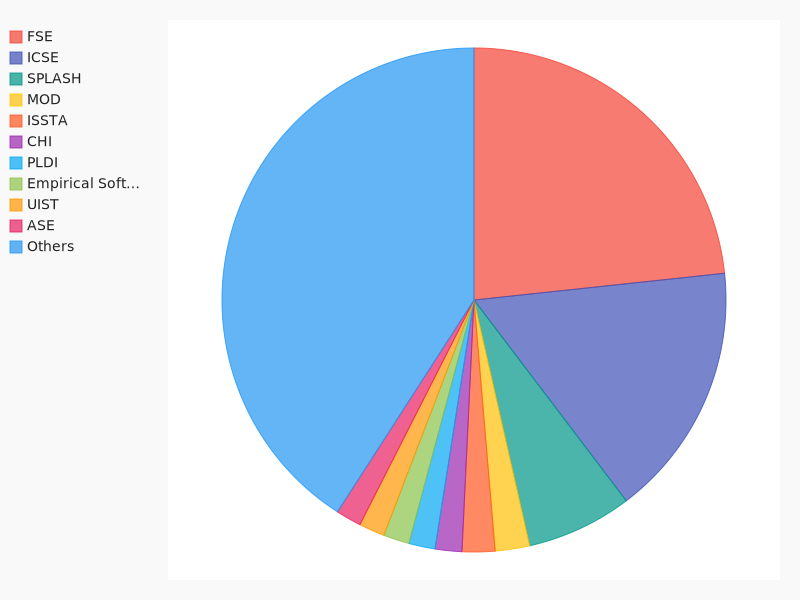

In [4]:
BORDER = 10

venue_dict = {}
chart = pygal.Pie()

for article in db.Article.select():
    if article.venue_id not in venue_dict.keys():
        venue_dict[article.venue_id] = 1
    else:
        venue_dict[article.venue_id] += 1

sorted_tuples = sorted(venue_dict.items(), key=operator.itemgetter(1), reverse=True)[1:]
del sorted_tuples[2]

for pair in sorted_tuples[:BORDER]:
    chart.add(pair[0].name, pair[1]/len(db.Article.select()))
chart.add('Others', sum([pair[1] for pair in sorted_tuples[BORDER:]])/len(db.Article.select()))
# chart.render_in_browser()
chart.render_to_png('visualization/distribution_of_venues')
chart